In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Show the first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()          # Overview of columns and data types
df.shape           # Number of rows and columns
df.columns         # List of all columns
df.describe()      # Statistical summary of numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Clean column names in case of extra spaces
df.columns = df.columns.str.strip()

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column (too many missing values)
if 'Cabin' in df.columns:
    df = df.drop('Cabin', axis=1)


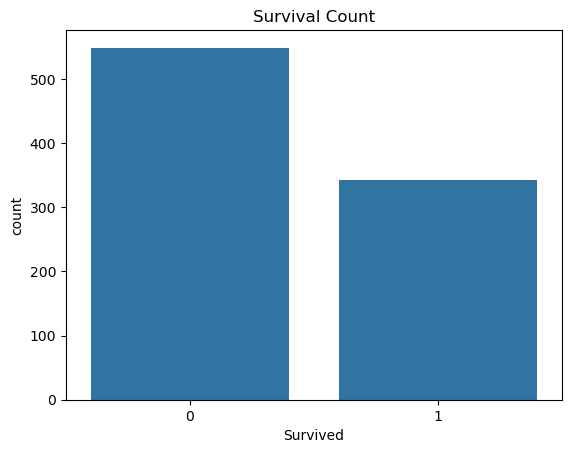

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


<Axes: xlabel='Sex', ylabel='count'>

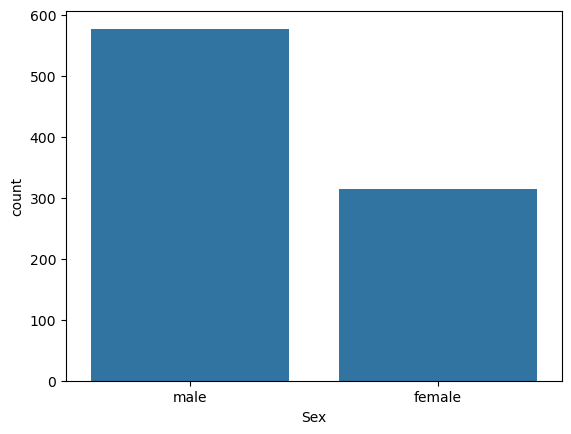

In [7]:
sns.countplot(x='Sex', data=df)


<Axes: xlabel='Age', ylabel='Count'>

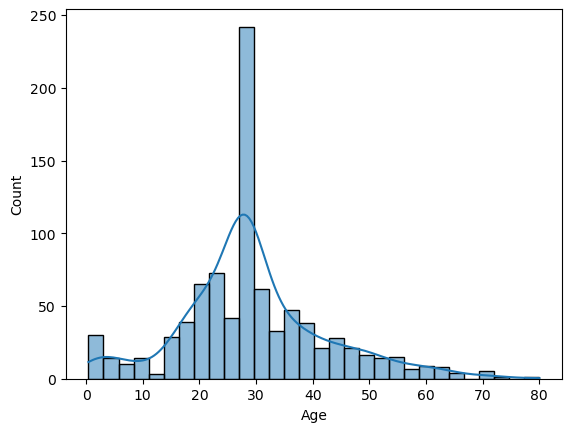

In [8]:
sns.histplot(df['Age'], bins=30, kde=True)


<Axes: xlabel='Survived', ylabel='count'>

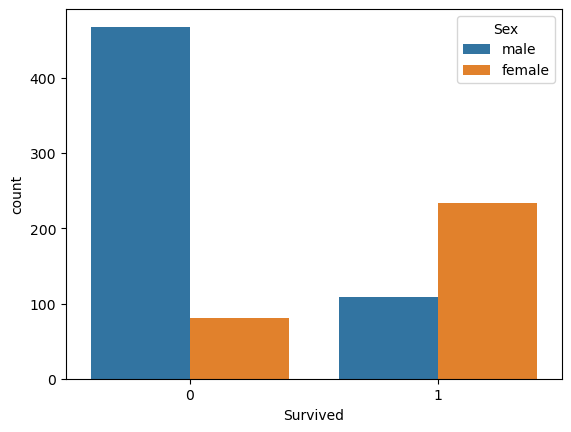

In [9]:
sns.countplot(x='Survived', hue='Sex', data=df)


<Axes: xlabel='Pclass', ylabel='count'>

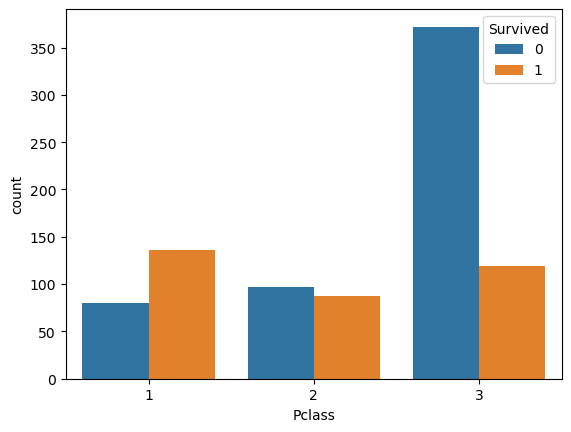

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=df)


<Axes: xlabel='Survived', ylabel='Age'>

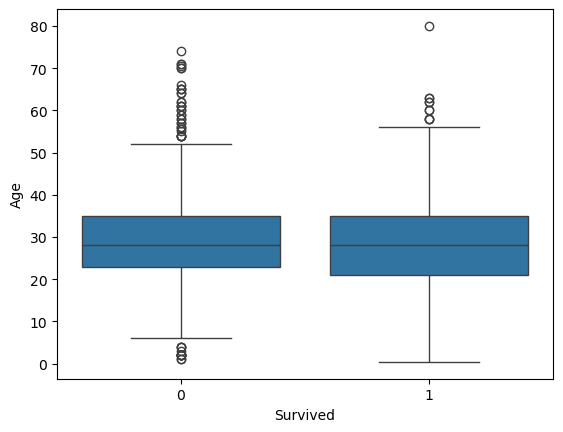

In [11]:
sns.boxplot(x='Survived', y='Age', data=df)


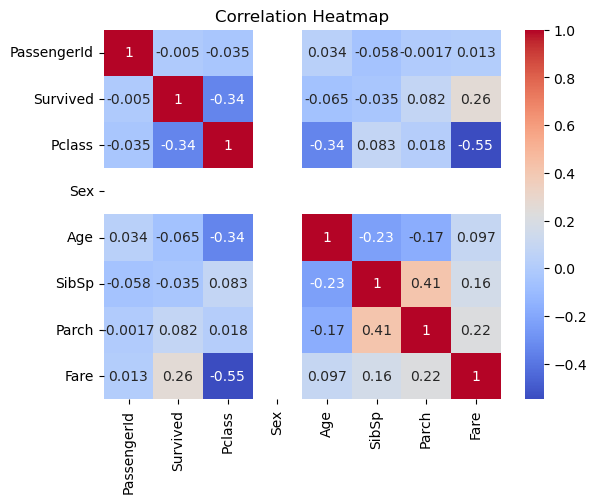

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Encode 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Optional: Also encode other columns if needed (like 'Pclass', 'Embarked')
# df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})  # if not already done

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [14]:
df.to_csv('titanic_cleaned.csv', index=False)


In [ ]:
### Conclusion:

- Data cleaning was done by filling missing values in Age and Embarked.
- Cabin column was dropped due to many missing values.
- EDA revealed interesting insights:
  - Females survived more than males.
  - Higher-class passengers had higher survival rates.
  - Age and Fare show a slight trend in survival.

This analysis provides a foundation for building predictive models.
